## Average filtering using loops

True

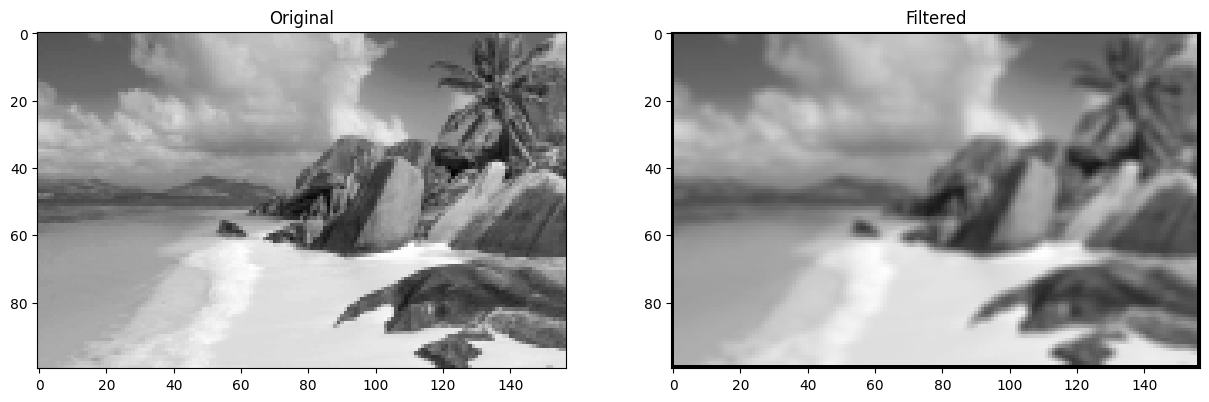

In [86]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

# Define a function for image filtering using a given kernel
def filter(image, kernel):
    # Ensure the kernel dimensions are odd to have a clear center pixel for convolution
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    
    # Calculate the half-height and half-width of the kernel
    k_hh, k_hw = math.floor(kernel.shape[0] / 2), math.floor(kernel.shape[1] / 2)
    
    # Get the height and width of the input image
    h, w = image.shape
    
    # Normalize the image to floating-point range [0.0, 1.0]
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    
    # Initialize an array to store the filtered result
    result = np.zeros(image.shape, 'float')
    
    # Iterate over each pixel position in the image
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):            
            # Convolution operation: dot product between image slice and kernel
            result[m, n] = np.dot(image_float[m - k_hh:m + k_hh + 1, n - k_hw:n + k_hw + 1].flatten(), kernel.flatten())
            
    # Return the filtered result
    return result

# Load the input image in reduced grayscale mode
img = cv.imread('plage.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)

# Set up a subplot for displaying original and filtered images side by side
f, axarr = plt.subplots(1, 2,figsize=(15,20))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')

# Define a kernel for filtering (averaging kernel for blurring)
kernel = np.array([(1/9, 1/9, 1/9), (1/9, 1/9, 1/9), (1/9, 1/9, 1/9)], dtype='float')

# Apply the filter function to the input image
imgb = filter(img, kernel)

# Scale and convert filtered image for display and saving
imgb = imgb * 255.0
imgb = imgb.astype(np.uint8)

# Display the filtered image
axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('Filtered')

# Save the filtered image as a PNG file
cv.imwrite('keira_filtered.png', imgb)


## Averaging using filter2D


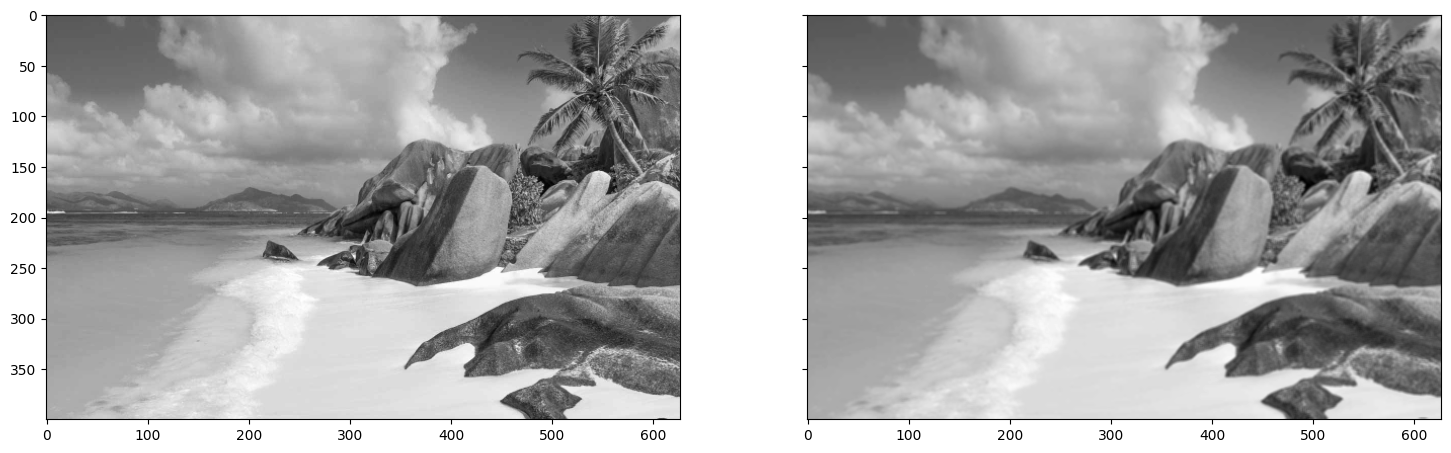

In [20]:

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


#import the image
image =  cv.imread('plage.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)

#Define the normalized kernel
kernel = np.ones((3,3),dtype=np.float16)/9

# filering with 2D convolution
filtered_image = cv.filter2D(image,-1,kernel)

#ploth both the images
fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(image,cmap='gray')
ax[1].imshow(filtered_image,cmap='gray')

## Sobel Vertical filtering

sobel vertical kernel
[[-2. -1. -2.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


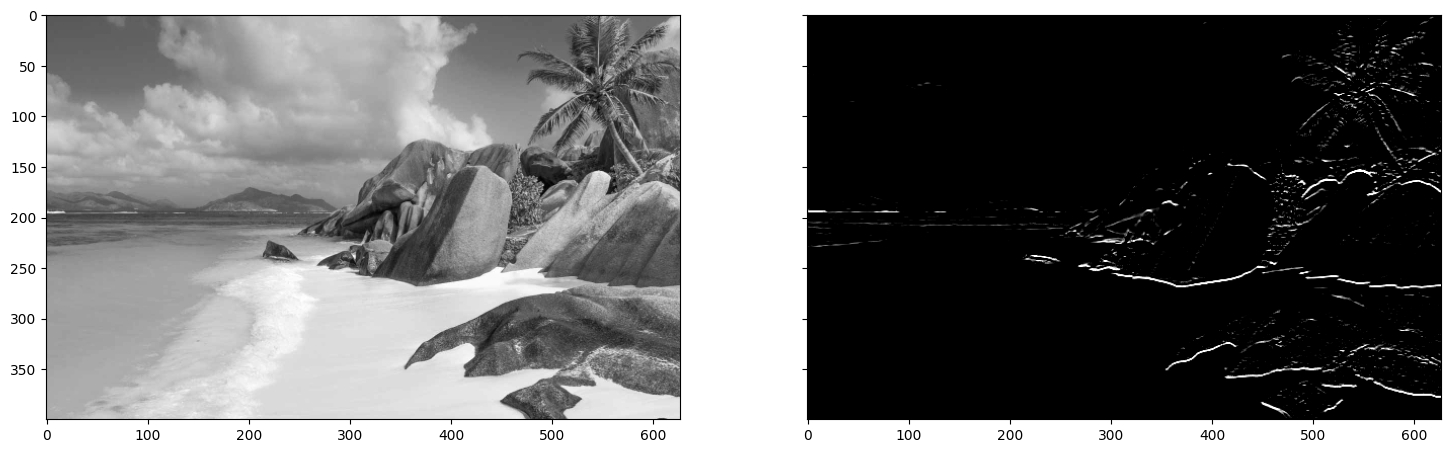

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# import the image
image =  cv.imread('plage.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)

# Define the sobel vertical kernel
kernel = np.array([(-2,-1,-2),(0,0,0,),(1,2,1)],dtype=np.float16)
print("sobel vertical kernel",kernel,sep='\n')

# filering with filter2D
filtered_image = cv.filter2D(image,-1,kernel)

#ploth both the images
fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(image,cmap='gray')
ax[1].imshow(filtered_image,cmap='gray')



## Sobel Horizontal filtering

sobel vertical kernel
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


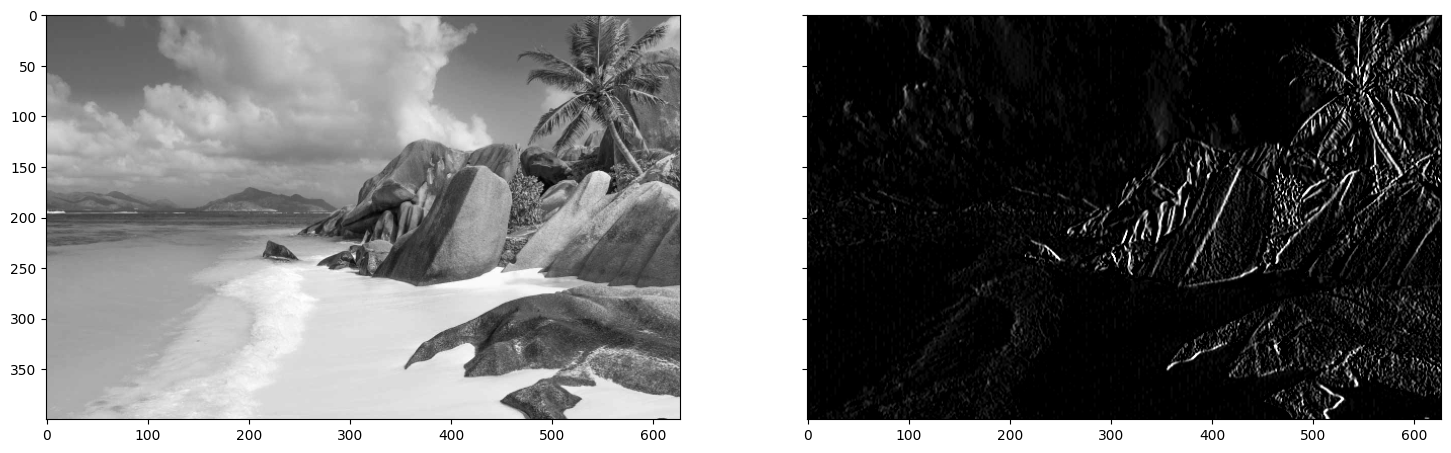

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# import the image
image =  cv.imread('plage.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)

# Define the sobel Horizontal kernel
kernel = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float16)
print("sobel Horizontal kernel",kernel,sep='\n')

# filering with filter2D
filtered_image = cv.filter2D(image,-1,kernel)

#ploth both the images
fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(image,cmap='gray')
ax[1].imshow(filtered_image,cmap='gray')

## Sharpening

gaussian blur kernel
[[0.15246914]
 [0.2218413 ]
 [0.25137912]
 [0.2218413 ]
 [0.15246914]]


Text(0.5, 1.0, 'weighted sharpened')

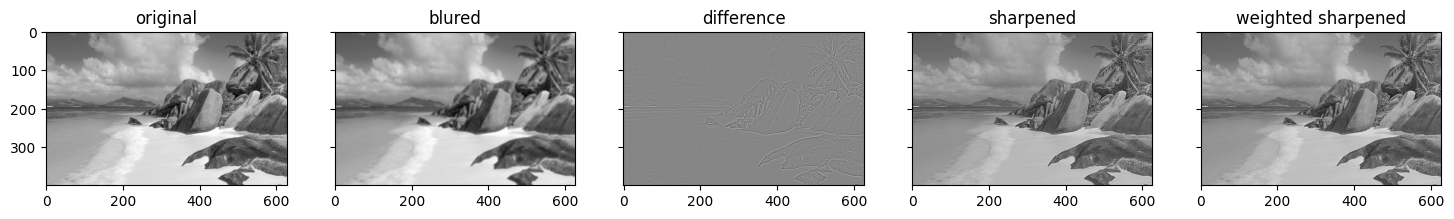

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# import the image
image = cv.imread('plage.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)

# Define the gaussian blur kernel
sigma = 2
kernel = cv.getGaussianKernel(5,sigma)
print("gaussian blur kernel",kernel,sep='\n')

# filering with filter2D
filtered_image = cv.sepFilter2D(image,-1,kernel,kernel)

# diffce between original and filtered image
difference = image.astype('float32') - filtered_image.astype('float32')

#sharpened image just adding them
sharpened_image = image.astype('float32') + difference.astype('float32')

#weighted addition -> sharpened image
weight_of_the_original_image = 2
weight_of_the_difference_image = 1.5
sharp_image_weighted = cv.addWeighted(image.astype('float32'),weight_of_the_original_image,difference,weight_of_the_difference_image,0)

#plot five images
fig, ax  = plt.subplots(1,5, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(image,cmap='gray')
ax[0].set_title('original')
ax[1].imshow(filtered_image,cmap='gray')
ax[1].set_title('blured')
ax[2].imshow(difference,cmap='gray')
ax[2].set_title('difference')
ax[3].imshow(sharpened_image,cmap='gray')
ax[3].set_title('sharpened')
ax[4].imshow(sharp_image_weighted,cmap='gray')
ax[4].set_title('weighted sharpened')


## Smoothing with box filter

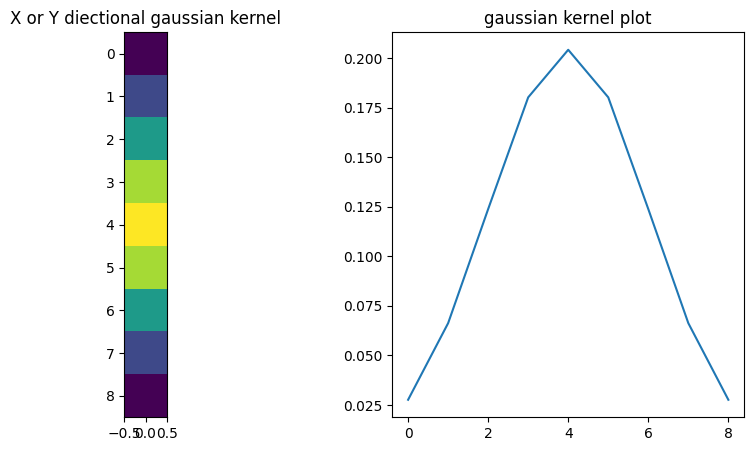

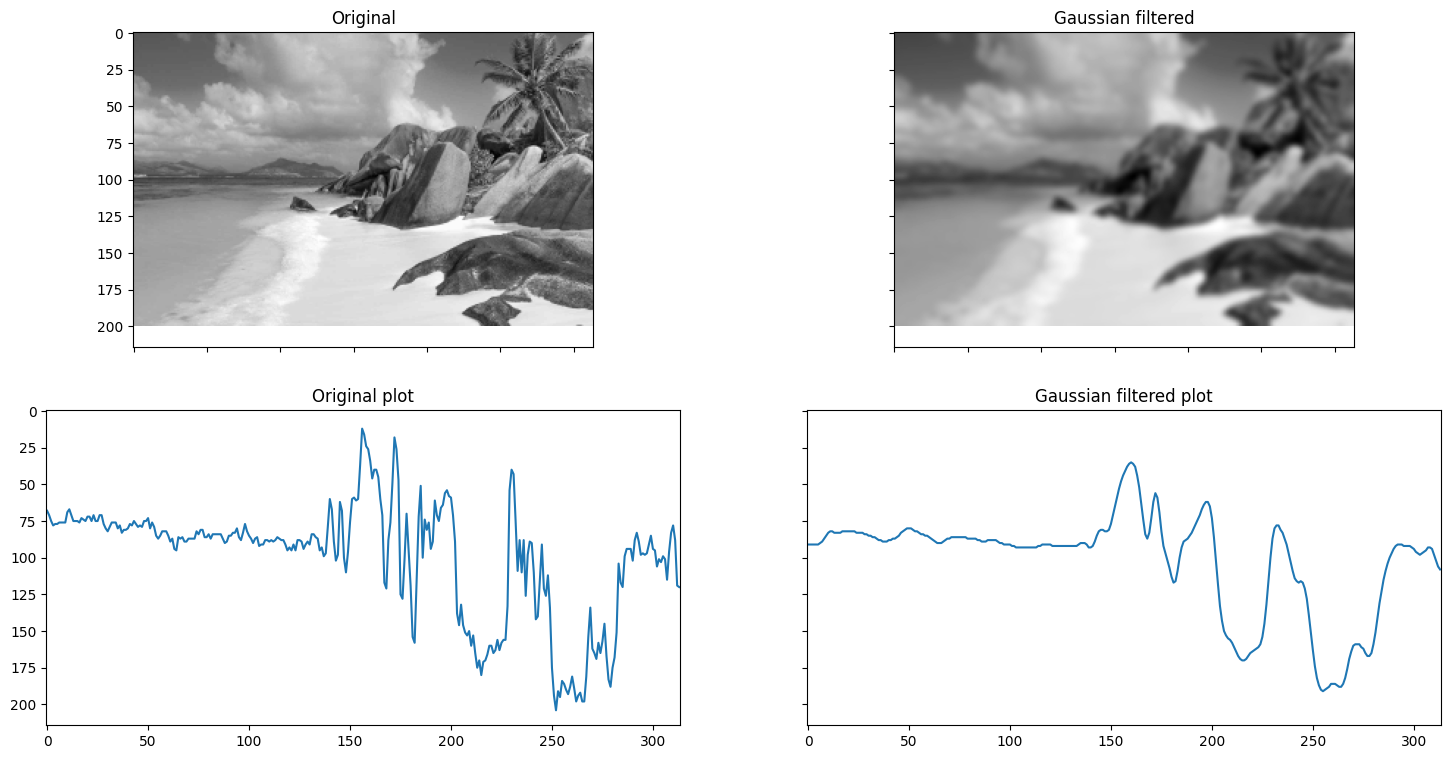

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


#import the image
img = cv.imread('plage.jpg',cv.IMREAD_REDUCED_GRAYSCALE_4)

# Define the kernel
box = 1./8.*np.ones((3,3),dtype=np.float16)
imgb = cv.filter2D(img,-1,box)

# box filter
sigma = 2
kernel_size = 9
gaus = cv.getGaussianKernel(kernel_size,sigma)

fig1,ax1 = plt.subplots(1,2,figsize=(10,5))
ax1[0].imshow(gaus)
ax1[0].set_title('X or Y diectional gaussian kernel')
ax1[1].plot(gaus)
ax1[1].set_title('gaussian kernel plot')
plt.show()

# gaussian filter
imgb = cv.sepFilter2D(img,-1,gaus,gaus)

# plot both the images AND two plots
fig, ax  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,9))
ax[0,0].imshow(img,cmap='gray')
ax[0,0].set_title('Original')
ax[0,1].imshow(imgb,cmap='gray')
ax[0,1].set_title('Gaussian filtered')
ax[1,0].plot(img[img.shape[0]//2,:])
ax[1,0].set_title('Original plot')
ax[1,1].plot(imgb[imgb.shape[0]//2,:])
ax[1,1].set_title('Gaussian filtered plot')
plt.show()



##  Creating a Gaussian kernel

(-5.494999999999998, 5.394999999999963, -5.494999999999998, 5.394999999999963)

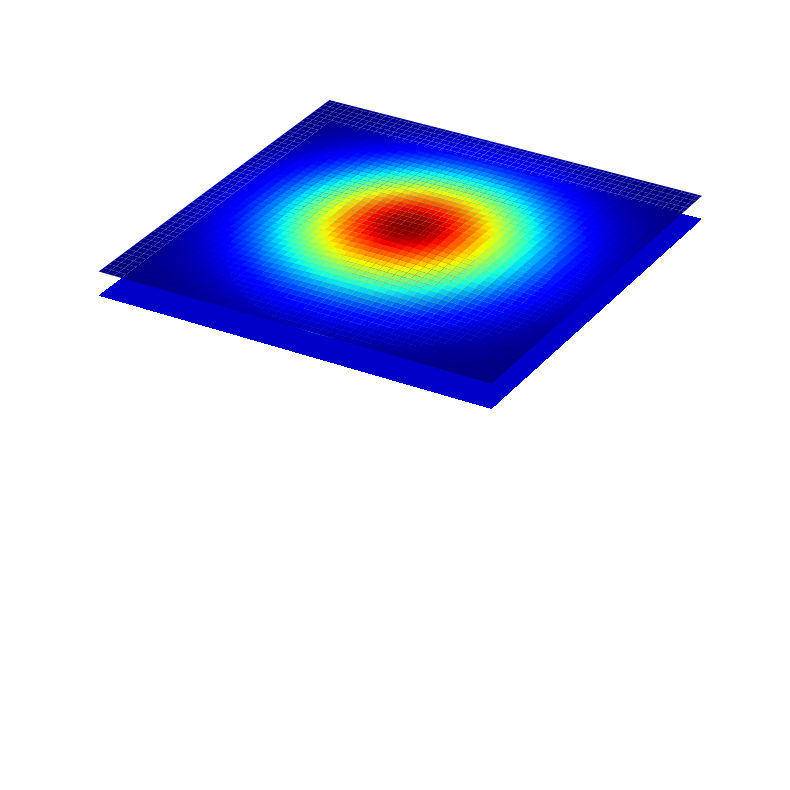

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

sigma = 2

x= np.arange(-5,5,0.1)
y= np.arange(-5,5,0.1)
x,y = np.meshgrid(x,y)
z = np.exp(-(x**2+y**2)/(2*sigma**2))/(2*np.pi*sigma**2)


ax.plot_surface(x,y,z,cmap=cm.jet,linewidth=0, antialiased=True)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

cset = ax.contourf(x,y,z,zdir='z',offset=-0.15,cmap=cm.jet)
ax.set_zlim(np.min(z)-2,np.max(z))

plt.axis('off')

## Gaussian Noise Filtering

Image Data type uint8
Max value of the image  255


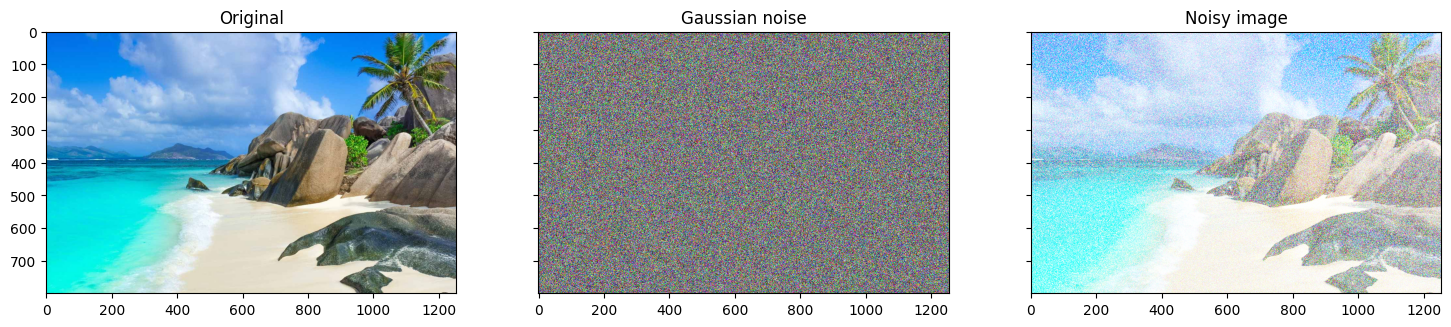

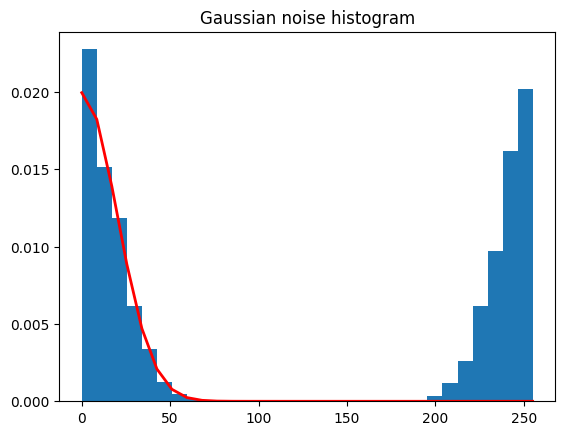

In [54]:
# Gaussian Noise Filtering
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#import the image
image = cv.imread('plage.jpg',cv.IMREAD_COLOR)

print("Image Data type",image.dtype)
print("Max value of the image ",np.max(image))

# define miu and sigma for gaussian noise
miu = 0
sigma = 20

# define the gaussian with the same shape as the image
gaussian = np.random.normal(miu,sigma,image.shape).astype('uint8')

# add the gaussian noise to the image
noisy_image = cv.add(image,gaussian,dtype=cv.CV_8UC3)

# plot both the 3d plot and the images
fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(image[:,:,::-1])
ax[0].set_title('Original')
ax[1].imshow(gaussian[:,:,::-1])
ax[1].set_title('Gaussian noise')
ax[2].imshow(noisy_image[:,:,::-1])
ax[2].set_title('Noisy image')
plt.show()

# histogram of the noisy image
count, bins, ignored = plt.hist(gaussian.flatten(),30,density=True)
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-miu)**2/(2*sigma**2)),linewidth=2,color='r')
plt.title('Gaussian noise histogram')
plt.show()

sigma = 5
kernel = cv.getGaussianKernel(11,sigma)
filtered_image = cv.sepFilter2D(noisy_image,-1,kernel,kernel)

cv.namedWindow('filtered_image',cv.WINDOW_NORMAL)
cv.imshow('filtered_image',filtered_image)
cv.waitKey(0)
cv.destroyAllWindows()



## Effect of $\sigma$

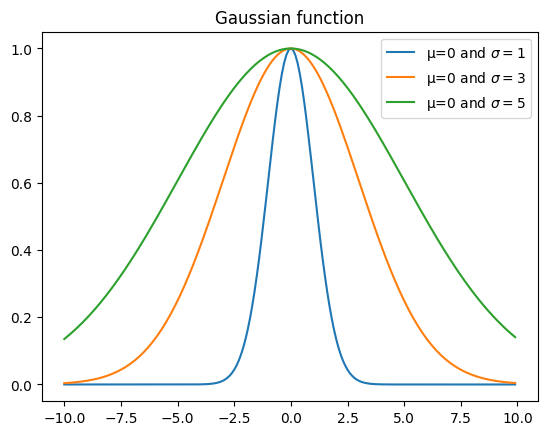

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tikzplotlib as tpl

# define the gaussian function
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

#create array of numbers 
x = np.arange(-10,10,0.1)

# plot the gaussian function
plt.plot(x,gaussian(x,0,1),label='μ=0 and $\sigma=1$')
plt.plot(x,gaussian(x,0,3),label='μ=0 and $\sigma=3$')
plt.plot(x,gaussian(x,0,5),label='μ=0 and $\sigma=5$')
plt.title('Gaussian function')
plt.legend()
plt.show()


## Noise

DescribeResult(nobs=3009600, minmax=(0.0, 255.0), mean=152.66754241115987, variance=5298.573041823901, skewness=-0.4549217085894188, kurtosis=-0.9318707462799836)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


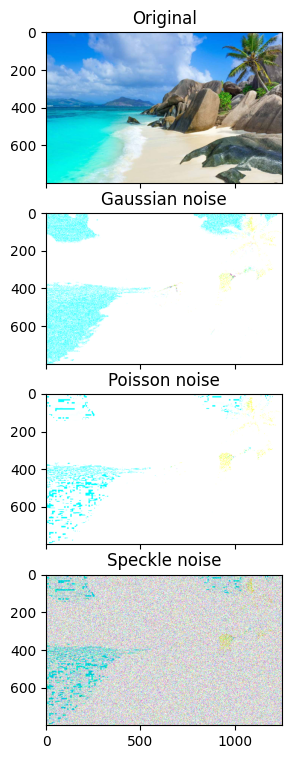

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
import numpy as np
from scipy import stats



def noisy(noise_typ,image):    
    """
    Parameters
    ----------
    image : ndarray
        Input image data. Will be converted to float.
    mode : str
        One of the following strings, selecting the type of noise to add:

        'gauss'     Gaussian-distributed additive noise.
        'poisson'   Poisson-distributed noise generated from the data.
        's&p'       Replaces random pixels with 0 or 1.
        'speckle'   Multiplicative noise using out = image + n*image,where
                    n is uniform noise with specified mean & variance.
        
        Source: https://stackoverflow.com/a/30609854
    """    
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 100.
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        print(stats.describe(noisy.ravel()))
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.2
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        return noisy
    
# load the image
image = cv.imread('plage.jpg',cv.IMREAD_COLOR)
img_noisy_gaussian = noisy("gauss",image.astype('float32'))
img_noisy_poisson = noisy("poisson",image.astype('float32'))
img_noisy_speckle = noisy("speckle",image.astype('float32'))

# plot the images
fig, ax  = plt.subplots(4,1, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(image[:,:,::-1])
ax[0].set_title('Original')
ax[1].imshow(img_noisy_gaussian[:,:,::-1])
ax[1].set_title('Gaussian noise')
ax[2].imshow(img_noisy_poisson[:,:,::-1])
ax[2].set_title('Poisson noise')
ax[3].imshow(img_noisy_speckle[:,:,::-1])
ax[3].set_title('Speckle noise')
plt.show()









   

## Effect of Gaussian Noise Level and Smoothing Level

#### Note: $2\sigma +1$ calculates the kernel size for Gaussian blurring in a way that adequately captures the spread of the Gaussian distribution while maintaining an odd size for proper centering.

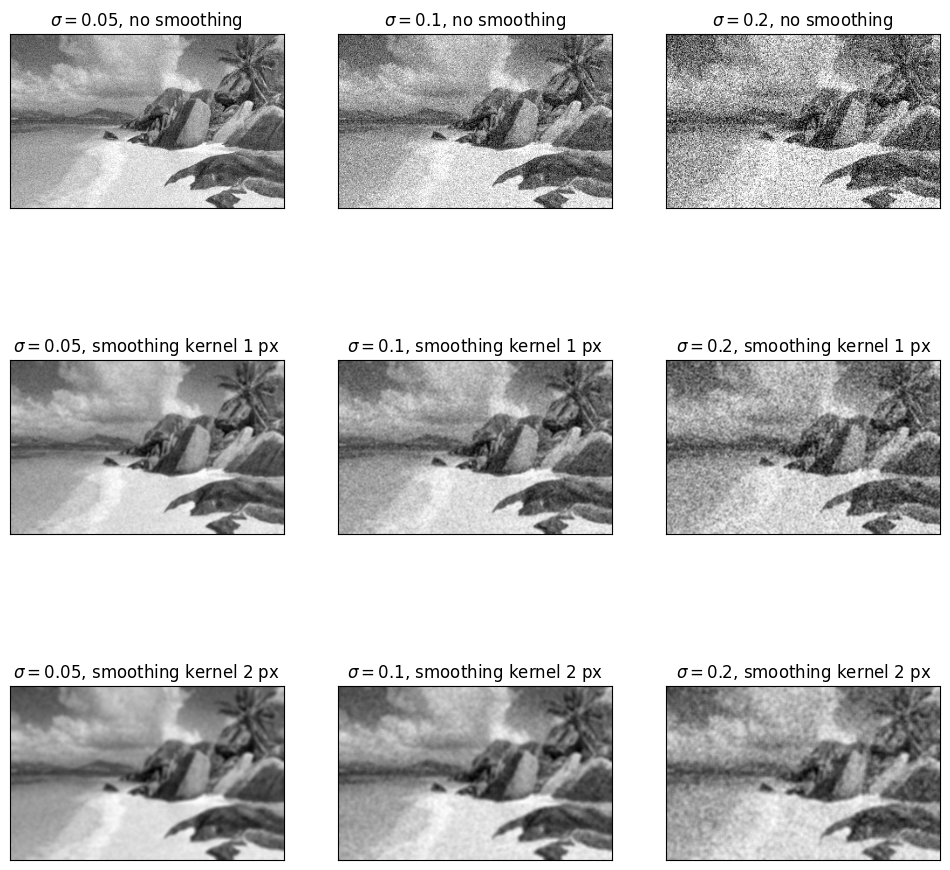

In [93]:
# Effect of Gaussian Kernel Size
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('plage.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
        
mean = 0.
noise = [0.05, 0.1, 0.2]
sigma = [0, 1, 2]
sigma_text = ['no smoothing', 'smoothing kernel 1 px', 'smoothing kernel 2 px']
fig, axes  = plt.subplots(3, 3, sharex='all', sharey='all', figsize=(12,12))



for i in range(3):
    for j in range(3):
        gauss = np.random.normal(mean,noise[i]*255., img.shape)
        gauss = gauss.reshape(img.shape)
        imn = img + gauss
        imn = np.clip(imn, 0.0, 255.0)
        ksize = sigma[j]*2+1             ### <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        if j != 0:
            imn = cv.GaussianBlur(imn, (ksize, ksize), sigmaX=sigma[j], sigmaY=sigma[j])
        
        axes[j,i].imshow(imn, cmap='gray')
        axes[j,i].set_title(r'$\sigma={0}$, {1}'.format(noise[i], sigma_text[j]))
        axes[j,i].set_xticks([]), axes[j,i].set_yticks([])


## Failure of Gaussian Smoothing to Handle Salt and Pepper Noise
##### looks like the median blur is the champ here..!!

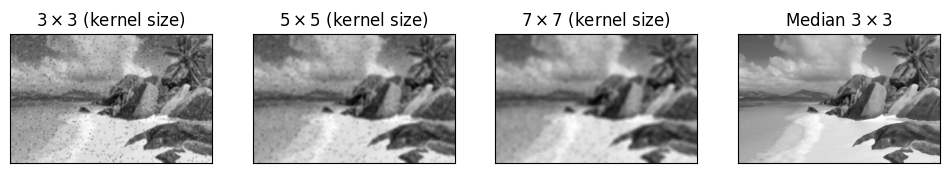

In [98]:
# Effect of Gaussian Kernel Size
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the reduced grayscale image
img = cv.imread('plage.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)

# Generate noisy image with salt-and-pepper noise
def noisy(noise_type, image):
    if noise_type == "s&p":
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
        out[coords[0], coords[1]] = 255

        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in image.shape]
        out[coords[0], coords[1]] = 0
        return out

# Generate noisy image with salt-and-pepper noise
imn = noisy('s&p', img.astype('float32'))

# Define different kernel sizes and corresponding sigma values
ksize = np.array([3, 5, 7])
sigma = ksize / 2.

# Create subplots for visualizing results
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(12, 12))

# Loop through different kernel sizes
for i in range(3):
    # Apply Gaussian blur with varying kernel sizes and sigmas
    imf = cv.GaussianBlur(imn, (ksize[i], ksize[i]), sigmaX=sigma[i], sigmaY=sigma[i])
    axes[i].imshow(imf, cmap='gray')
    axes[i].set_title(r'${0}\times {0}$ (kernel size)'.format(ksize[i]))
    axes[i].set_xticks([]), axes[i].set_yticks([])

# Apply median blur with kernel size 3x3
imf = cv.medianBlur(imn, 3)
axes[3].imshow(imf, cmap='gray')
axes[3].set_title(r'Median ${0}\times {0}$'.format(3))
axes[3].set_xticks([]), axes[3].set_yticks([])

# Show the plots
plt.show()


## Median Filtering

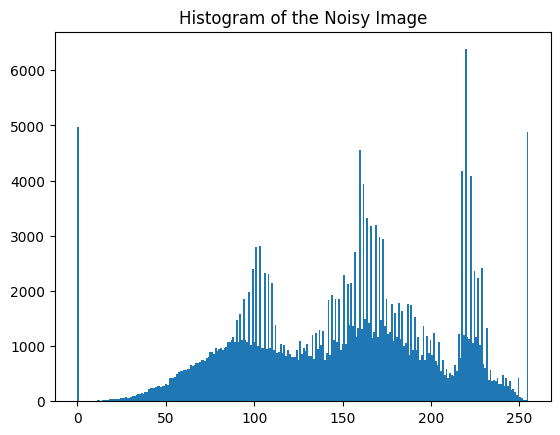

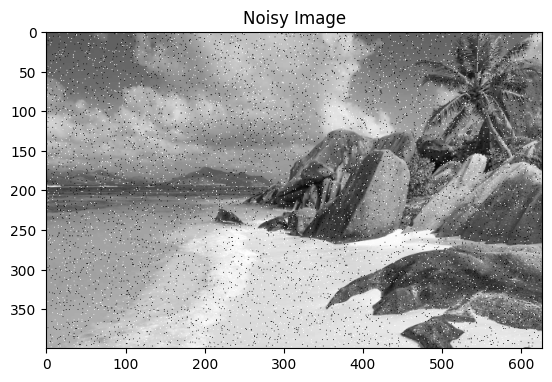

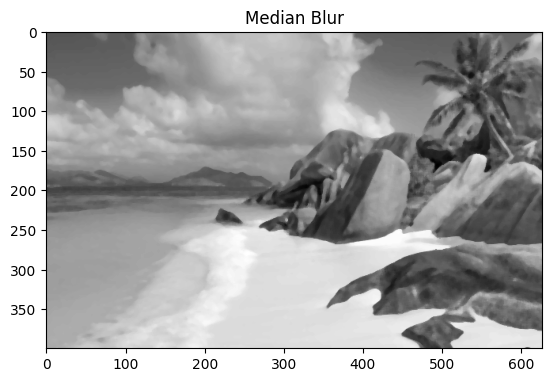

In [103]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('plage.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
image_s_p_noise =  noisy('s&p', img.astype('float32'))
image_median_blur = cv.medianBlur(image_s_p_noise, 5)

plt.hist(image_s_p_noise.ravel(), bins=256)
plt.title('Histogram of the Noisy Image')
plt.show()

plt.imshow(image_s_p_noise, cmap='gray')
plt.title('Noisy Image')
plt.show()

plt.imshow(image_median_blur, cmap='gray')
plt.title('Median Blur')
plt.show()

## Unsharp Mask Filter

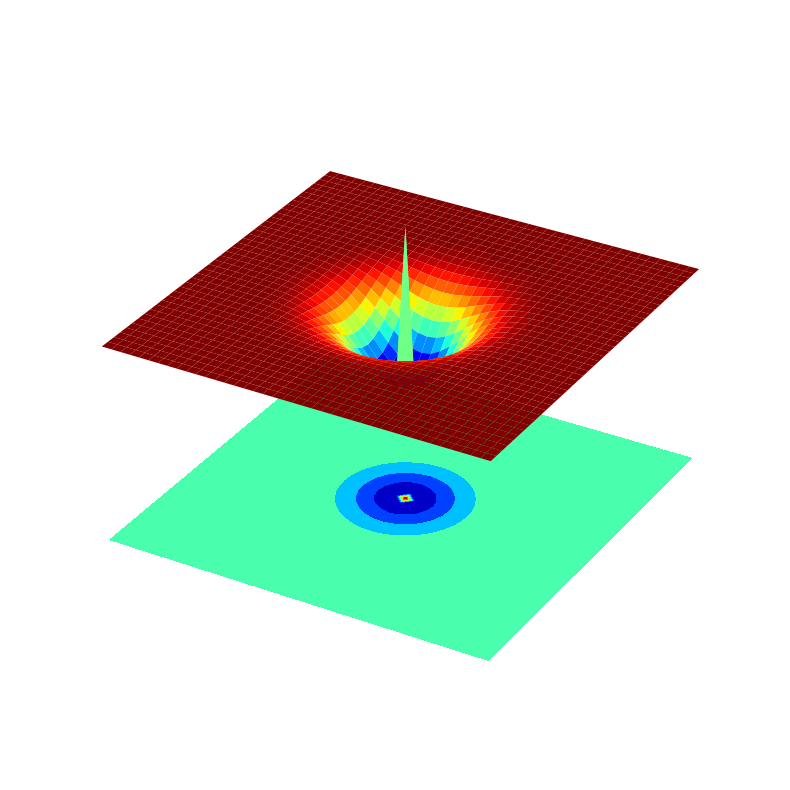

In [106]:
import cv2 as cv
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set the value of sigma for Gaussian distribution
sigma = 1

# Create a grid of x and y values using np.meshgrid
X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)

# Calculate the Gaussian distribution values
Z = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Create an impulse at the center
imp = np.zeros(Z.shape)
imp[int(Z.shape[0] / 2), int(Z.shape[1] / 2)] = 2
Z = imp - Z

# Plot the 3D surface using plot_surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Create a contour plot on the xy-plane
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) - 1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))

# Turn off the axes and grid lines
plt.axis('off')

# Show the plot
plt.show()


## Sharpenign Using Unsharp Marsking Filer

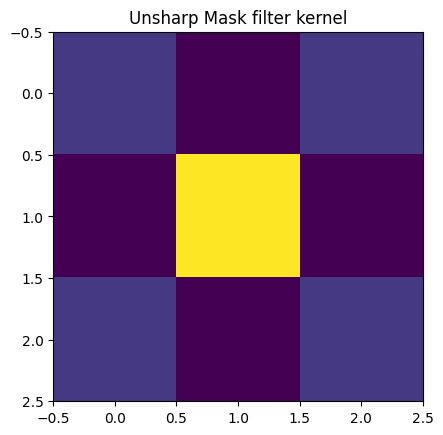

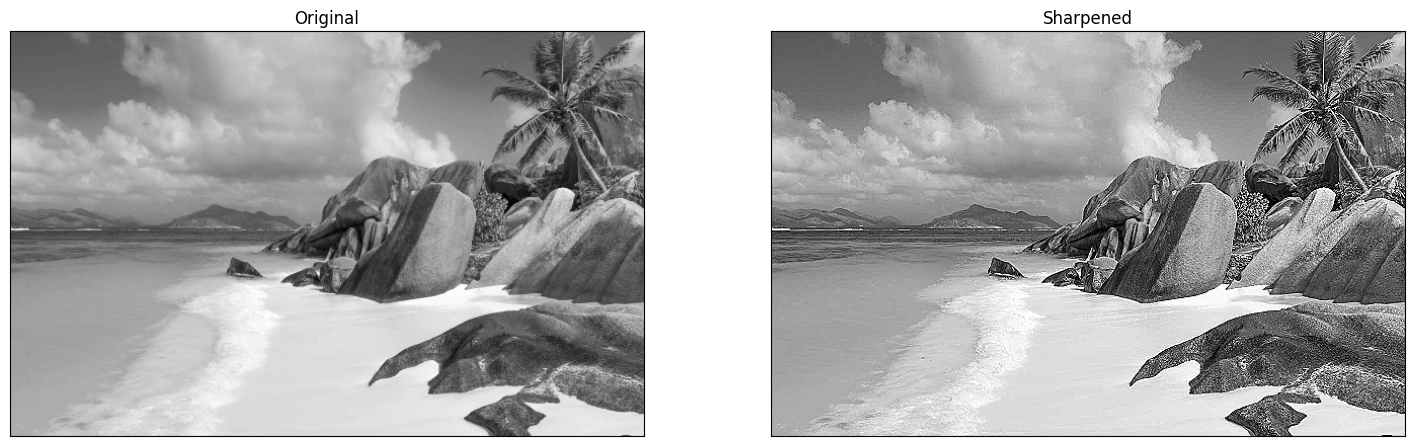

In [114]:
# Import necessary libraries and enable inline plotting
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read the image and reduce grayscale levels by a factor of 2
img = cv.imread('plage.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Define Unsharp Mask filter kernel
kernel = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)], dtype='float')
#plot the kernel
plt.imshow(kernel)
plt.title('Unsharp Mask filter kernel')
plt.show()


# Apply filter2D with the Unsharp Mask filter kernel
imgc = cv.filter2D(img, -1, kernel)

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 9))

# Display the original image in the first subplot
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

# Display the sharpened image (Unsharp Mask filter) in the second subplot
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]), axes[1].set_yticks([])

# Show the plots
plt.show()


## Hybrid Images

In [117]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy import misc
from scipy import ndimage
from scipy import misc
import math
import cv2 as cv

# Function to scale spectrum for visualization
def scaleSpectrum(A):
   return np.real(np.log10(np.absolute(A) + np.ones(A.shape)))

# Function to create Gaussian filter
def makeGaussianFilter(numRows, numCols, sigma, highPass=True):
   centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
   centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)

   def gaussian(i,j):
      coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
      return 1 - coefficient if highPass else coefficient

   return np.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])

# Function to filter in frequency domain
def filterDFT(imageMatrix, filterMatrix):
   shiftedDFT = fftshift(fft2(imageMatrix))
   filteredDFT = shiftedDFT * filterMatrix
   return ifft2(ifftshift(filteredDFT))

# Low-pass filtering
def lowPass(imageMatrix, sigma):
    n,m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=False))

# High-pass filtering
def highPass(imageMatrix, sigma):
   n,m = imageMatrix.shape
   return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=True))

# Hybrid image creation
def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
    highPassed = highPass(highFreqImg, sigmaHigh)
    lowPassed = lowPass(lowFreqImg, sigmaLow)
    cv.namedWindow('HP', cv.WINDOW_AUTOSIZE)
    cv.imshow('HP', highPassed.astype(np.uint8))
    cv.waitKey()
    return highPassed + lowPassed

# Main function
if __name__ == "__main__":
    einstein = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)
    marilyn = cv.imread("marilyn.png", cv.IMREAD_GRAYSCALE)

    hybrid = hybridImage(einstein, marilyn, 25, 10)
    
    cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
    cv.imshow('Image', hybrid.astype(np.uint8))
    cv.waitKey()
    cv.destroyAllWindows()


C:\Users\Dojitha Mirihagalla\AppData\Local\Temp\ipykernel_14108\3243188545.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  cv.imshow('HP', highPassed.astype(np.uint8))
C:\Users\Dojitha Mirihagalla\AppData\Local\Temp\ipykernel_14108\3243188545.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  cv.imshow('Image', hybrid.astype(np.uint8))
